In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib as plb
import seaborn as sns
from scipy import stats
import statistics

In [126]:
nano_sum = pd.read_csv("C:/Users/Emily/Desktop/NanoR/subset.csv", index_col=0)

In [127]:
nano_sum.head()

,WellNo,area,Total Worms,Chemotaxis,Compound L,Compound R,Strain,File Name,Well width,Plate ID,Passes QC
0,1A,2303109,217,-0.697561,dmso,1-octanol,N2,Nano_im005,3027,NR_3_1,Y
1,1B,2329200,193,-0.649718,huperzine a,1-octanol,N2,Nano_im005,3040,NR_3_1,Y
2,1C,2330703,155,-0.552448,2-methyl-1-butanol,1-octanol,N2,Nano_im005,3033,NR_3_1,Y
3,1D,2335699,84,-0.470588,phytol,1-octanol,N2,Nano_im005,3025,NR_3_1,N
4,2A,2336582,176,-0.800000,diacetyl,1-octanol,N2,Nano_im005,3044,NR_3_2,Y


In [128]:
def to_mm(df, m):
    #middle = df['Well width'].mean()/2

    # 1 inch = 25.4mm
    mm = 25.4
    # 1200 pixels per 25.4mm
    px_mm = 1200/mm

    middle_mm = m/px_mm

    #The following transforms the worm location data so that it is respective to the start zone
    # The start zone is at the center of the image; Start Zone = 0mm
    #Worms with positive values are closer to the compound, negative values are away from the compound
    df['X'] = df['X'].apply(lambda x: -(x/px_mm)+middle_mm)
    return df['X']

In [129]:
def get_worm_locs(row, wrms): 

    fname = row['File Name']
    wellnum = row['WellNo']
    strong = row['Compound R']
    width = row['Well width']/2
    loc_fname =  wrms.joinpath('loc_' + fname + '_' + wellnum + '.csv')
    temp = pd.read_csv(loc_fname, index_col=0)
    converted = to_mm(temp, width)
    return converted
    #converted.to_csv('C:/Users/Emily/Desktop/NanoR/mm/loc_' + fname + '_' + wellnum + '_' + strong + '_mm.csv')

In [130]:
all_data = pd.DataFrame()
wrm_locs_fldr = plb.Path('C:/Users/Emily/Desktop/NanoR/image_analysis/')
for index, row in nano_sum.iterrows():
    f = get_worm_locs(row, wrm_locs_fldr)
    control = row['Compound R']
    print(control)
    test = row['Compound L']
    #temp =  pd.DataFrame(zip(control,test,f),columns=['Control', 'Test', 'Position'])
    hold = pd.DataFrame(columns = ['Control', 'Test', 'Position'])
    temp = hold.append(pd.DataFrame({'Control': control, 'Test' : test, 'Position': f}), ignore_index = True)
    all_data = all_data.append(temp)


1-octanol
1-octanol
1-octanol
1-octanol
1-octanol
1-octanol
1-octanol
1-octanol
1-octanol
dmso
1-octanol
1-octanol
isoamyl alcohol
isoamyl alcohol
isoamyl alcohol
isoamyl alcohol
isoamyl alcohol
isoamyl alcohol
isoamyl alcohol
isoamyl alcohol
isoamyl alcohol
isoamyl alcohol
isoamyl alcohol
isoamyl alcohol


<AxesSubplot:xlabel='Test', ylabel='Position'>

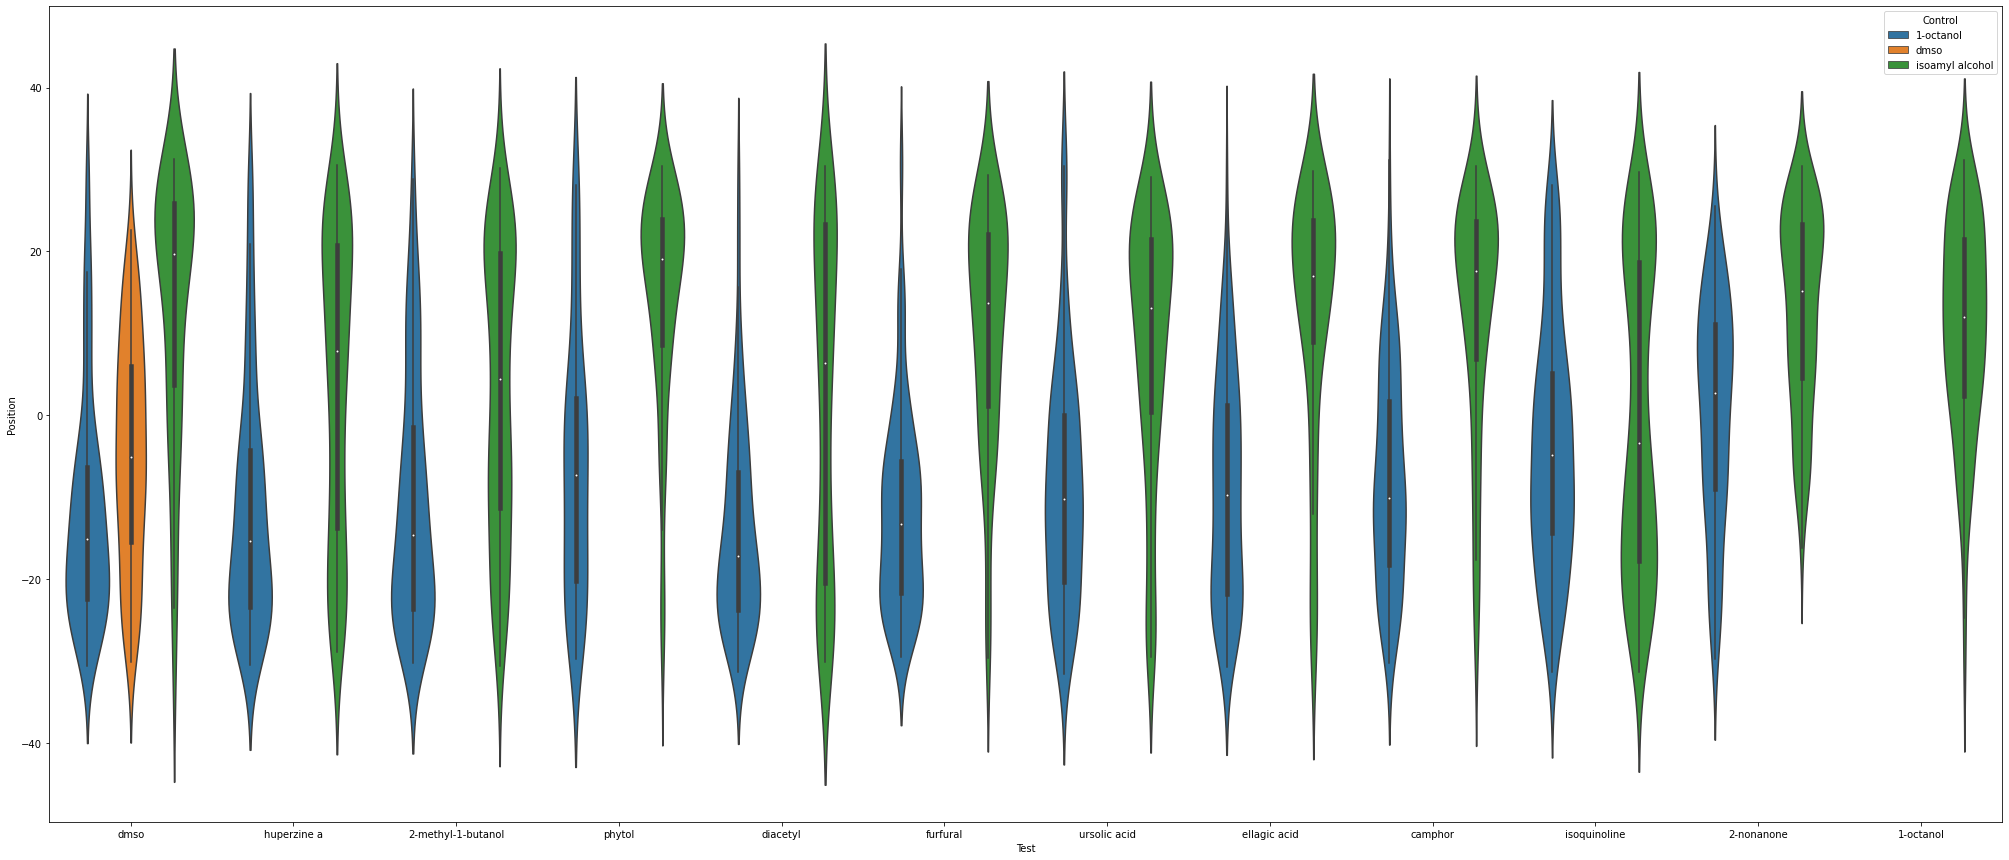

In [101]:
fig, ax = plt.subplots(figsize=(35, 15))
sns.violinplot(data=all_data, x='Test', y='Position', hue='Control')

In [132]:
oc = all_data.loc[(all_data['Control'] == '1-octanol')]
ia = all_data.loc[(all_data['Control'] == 'isoamyl alcohol')]

<AxesSubplot:xlabel='Test', ylabel='Position'>

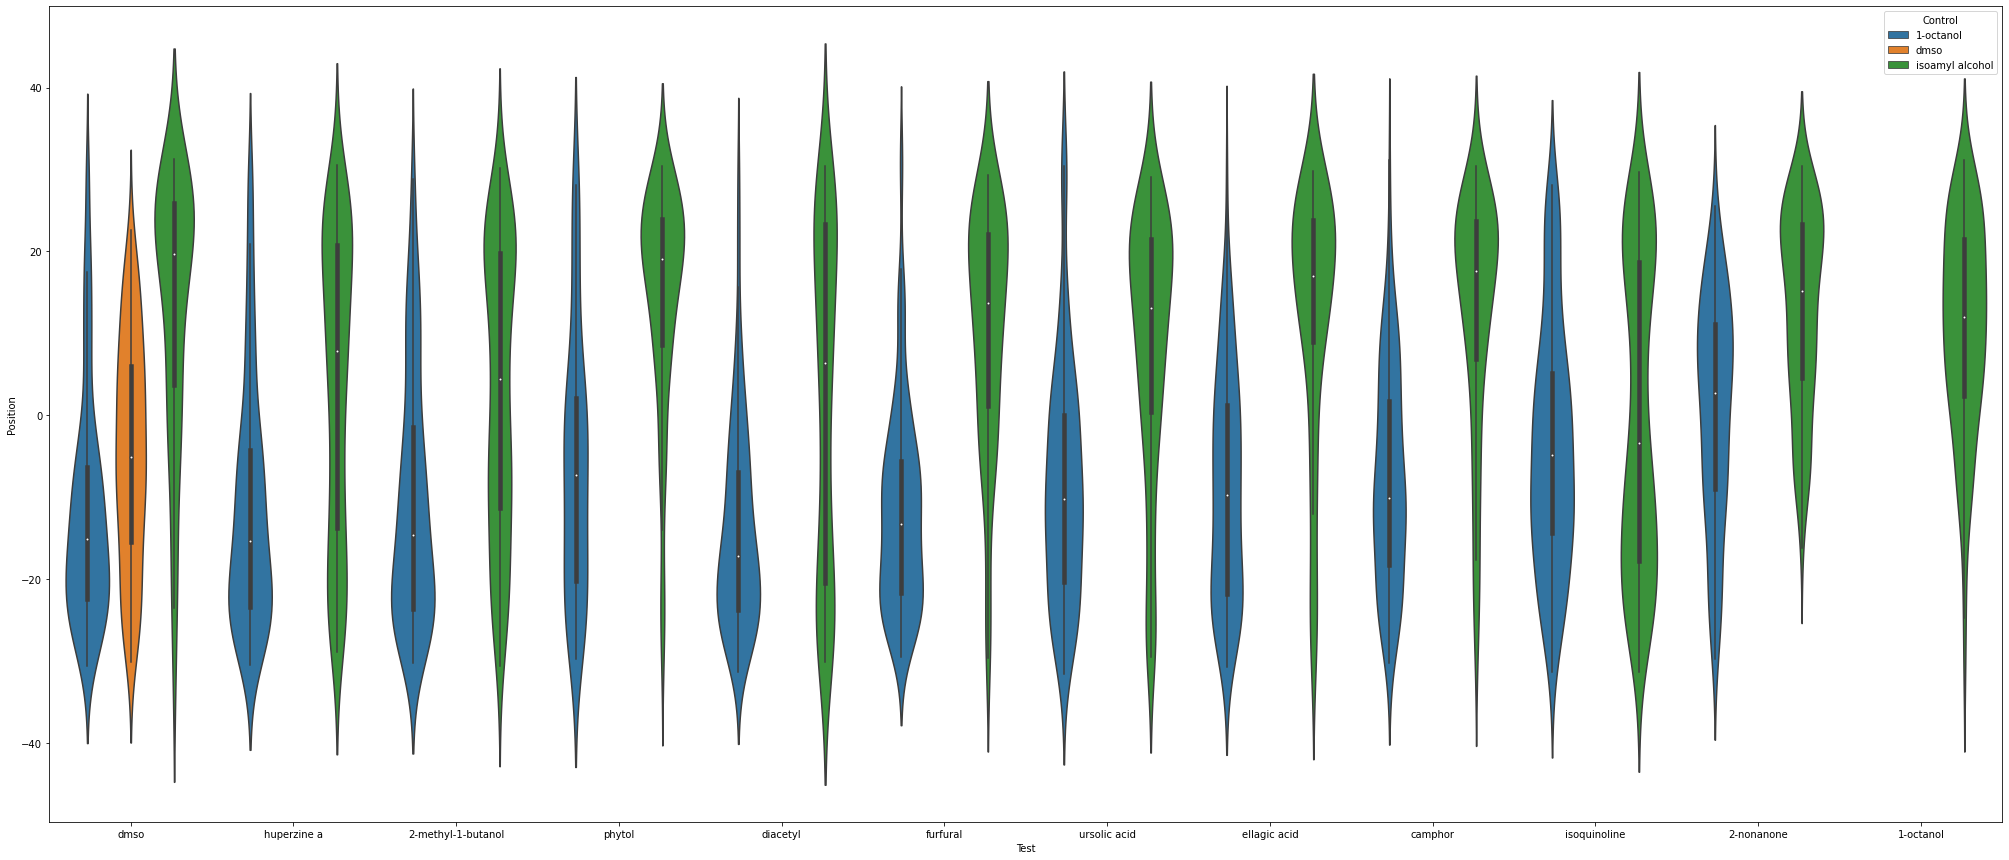

In [131]:
fig, ax = plt.subplots(figsize=(35, 15))
sns.violinplot(data=all_data, x='Test', y='Position', hue='Control')

In [143]:
comp_ord = ['isoamyl alcohol', '2-methyl-1-butanol', 'diacetyl', 'isoquinoline', 'furfural', 'huperzine a', 'ursolic acid', 'camphor',
            'ellagic acid', '2-nonanone', 'phytol', '1-octanol']

comp_noia = ['2-methyl-1-butanol', 'diacetyl', 'isoquinoline', 'furfural', 'huperzine a', 'ursolic acid', 'camphor',
            'ellagic acid', '2-nonanone', 'phytol', '1-octanol']

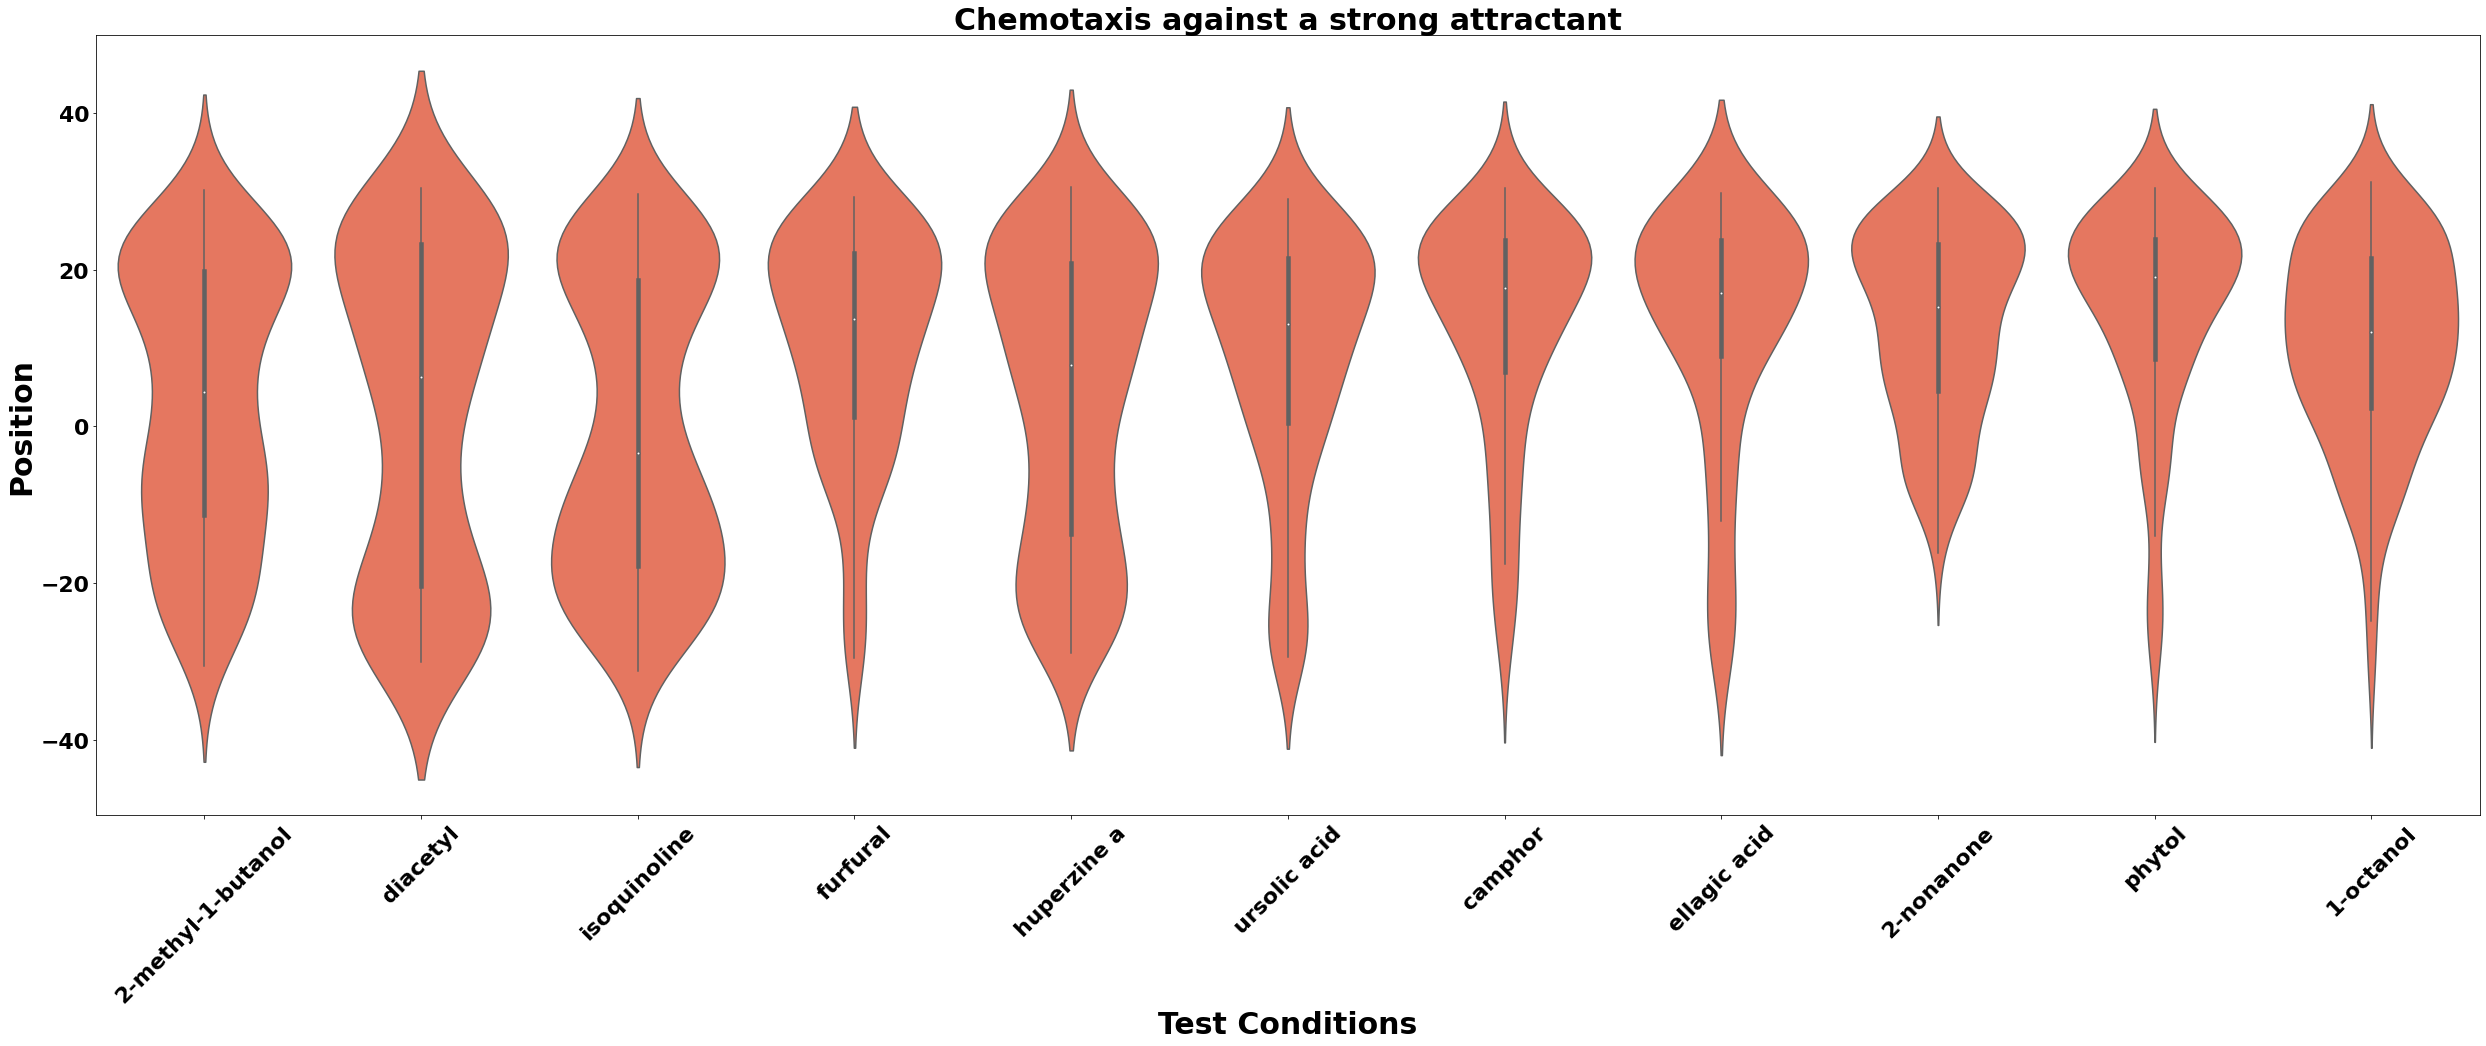

In [177]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(35, 15))
sns.violinplot(data=ia, x='Test', y='Position', hue='Control', palette='Reds', order=comp_noia)
plt.xlabel('Test Conditions', fontsize=30, weight='bold')
plt.ylabel('Position', fontsize=30, weight='bold')
plt.xticks(rotation=45)
plt.title('Chemotaxis against a strong attractant', fontsize=30, weight='bold')
plt.tight_layout()
ax.get_legend().remove()
plt.savefig('C:/Users/Emily/Desktop/NanoR/against_attractant.png')

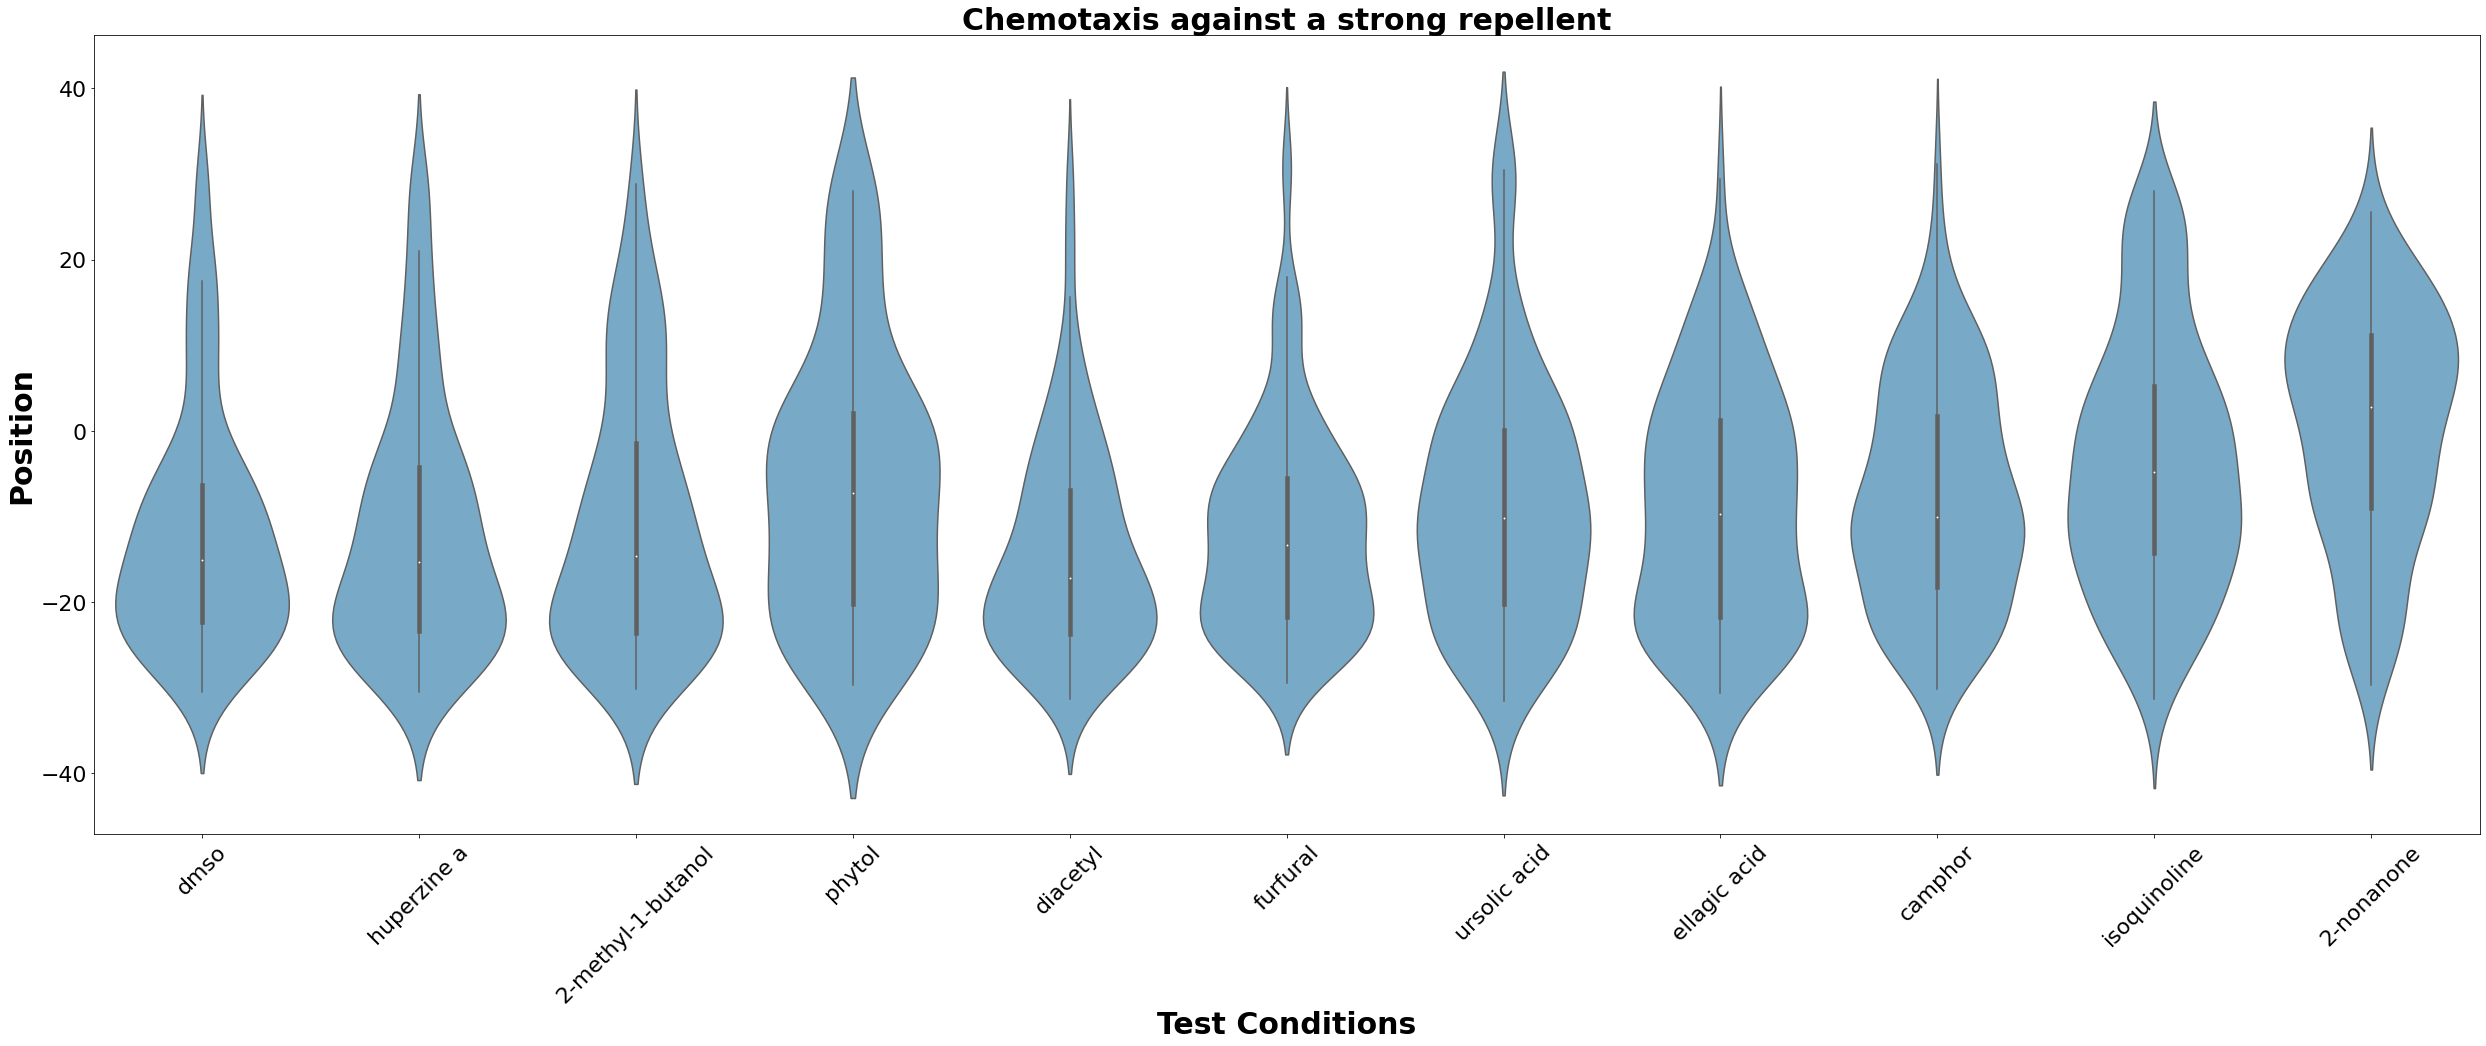

In [178]:
font = {'weight' : 'normal',
        'size'   : 22}
plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(35, 15))
sns.violinplot(data=oc, x='Test', y='Position', hue='Control', palette= 'Blues')
plt.xlabel('Test Conditions', fontsize=30, weight='bold')
plt.ylabel('Position', fontsize=30, weight='bold')
plt.xticks(rotation=45)
plt.title('Chemotaxis against a strong repellent', fontsize=30, weight='bold')
ax.get_legend().remove()
plt.tight_layout()
plt.savefig('C:/Users/Emily/Desktop/NanoR/against_repellant.png')